In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c dogs-vs-cats

 99% 808M/812M [00:08<00:00, 122MB/s]
100% 812M/812M [00:08<00:00, 105MB/s]


In [4]:
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


**Count the total files in train folder**

In [6]:
import os

path, dirs, files = next(os.walk("/content/train"))
file_count = len(files)
print("Number of images: ", file_count)

Number of images:  25000


**Stores files in a list and print**

In [7]:
file_names = os.listdir('/content/train/')
print(file_names)

['dog.10978.jpg', 'cat.1652.jpg', 'dog.12244.jpg', 'cat.2233.jpg', 'dog.3401.jpg', 'dog.9706.jpg', 'cat.9476.jpg', 'dog.1.jpg', 'cat.6145.jpg', 'dog.4271.jpg', 'dog.3738.jpg', 'cat.11144.jpg', 'cat.9801.jpg', 'cat.6064.jpg', 'cat.10671.jpg', 'cat.9792.jpg', 'dog.3707.jpg', 'dog.9070.jpg', 'cat.2516.jpg', 'dog.12050.jpg', 'dog.9256.jpg', 'dog.11207.jpg', 'cat.10085.jpg', 'dog.6505.jpg', 'cat.90.jpg', 'cat.6649.jpg', 'dog.7232.jpg', 'cat.10605.jpg', 'cat.5450.jpg', 'cat.9395.jpg', 'dog.9548.jpg', 'cat.2612.jpg', 'cat.1210.jpg', 'dog.1091.jpg', 'cat.4596.jpg', 'dog.3484.jpg', 'cat.7710.jpg', 'cat.7549.jpg', 'cat.7555.jpg', 'cat.9541.jpg', 'dog.156.jpg', 'cat.3997.jpg', 'dog.8598.jpg', 'cat.3639.jpg', 'dog.8685.jpg', 'dog.6266.jpg', 'cat.11665.jpg', 'cat.2501.jpg', 'dog.11996.jpg', 'dog.8790.jpg', 'dog.10865.jpg', 'cat.10501.jpg', 'cat.5610.jpg', 'cat.11279.jpg', 'dog.4473.jpg', 'dog.9283.jpg', 'dog.5607.jpg', 'dog.5507.jpg', 'dog.2100.jpg', 'cat.1638.jpg', 'cat.12126.jpg', 'dog.13.jpg', '

**Importing all the libraries**

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split

Display Dog Image

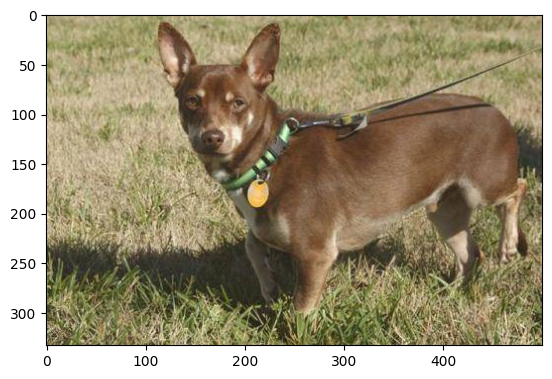

In [9]:
img = mpimg.imread("/content/train/dog.10978.jpg")
plt.imshow(img)
plt.show()

Display cat image

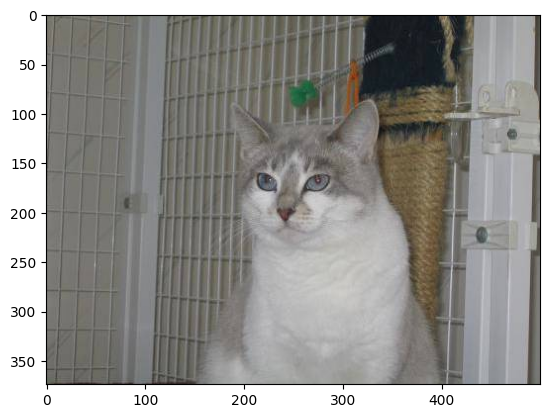

In [10]:
img = mpimg.imread("/content/train/cat.1652.jpg")
plt.imshow(img)
plt.show()

In [11]:
dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


Create reshape new folder to store all resize image

In [12]:
os.mkdir('/content/image resize')

In [13]:
original_folder = '/content/train/'
resized_folder = '/content/image resize/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

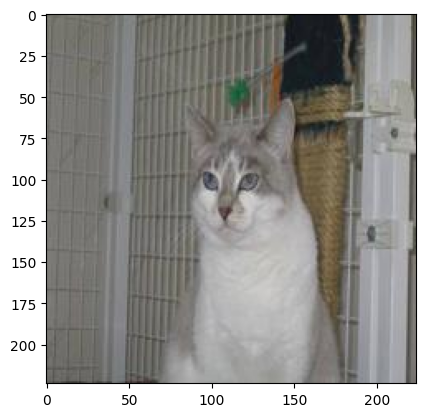

In [14]:
img = mpimg.imread("/content/image resize/cat.1652.jpg")
plt.imshow(img)
plt.show()

Creating label for resize Image

cat --> 0
dog --> 1

In [15]:
filenames = os.listdir("/content/image resize/")

labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)
  else:
    labels.append(0)

In [16]:
print(filenames[0:5])
print(len(filenames))

['dog.10978.jpg', 'cat.1652.jpg', 'dog.12244.jpg', 'cat.2233.jpg', 'dog.3401.jpg']
2000


In [17]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1027  973]


In [18]:
import cv2
import glob

In [19]:
image_directory = "/content/image resize/"
image_extension = ['png', 'jpg']
files = []
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [20]:
print(dog_cat_images)

[[[[133 169 179]
   [138 174 184]
   [149 185 195]
   ...
   [130 167 181]
   [142 180 192]
   [136 174 186]]

  [[142 178 188]
   [136 172 182]
   [141 177 187]
   ...
   [128 165 179]
   [139 177 189]
   [133 171 183]]

  [[144 183 192]
   [124 163 172]
   [120 159 168]
   ...
   [126 165 179]
   [132 172 184]
   [126 166 178]]

  ...

  [[100 139 147]
   [ 73 112 120]
   [ 80 119 128]
   ...
   [ 74 119 123]
   [104 151 155]
   [118 165 169]]

  [[ 75 116 125]
   [ 81 122 131]
   [ 96 137 146]
   ...
   [ 86 133 137]
   [ 91 138 142]
   [105 153 155]]

  [[ 74 117 126]
   [ 77 120 129]
   [ 78 119 128]
   ...
   [ 53 100 104]
   [ 30  78  80]
   [ 80 128 130]]]


 [[[ 97 105 105]
   [ 99 107 107]
   [103 111 111]
   ...
   [ 90 100 100]
   [ 54  66  68]
   [ 70  82  84]]

  [[101 109 109]
   [102 110 110]
   [103 111 111]
   ...
   [ 90 100 100]
   [ 54  66  68]
   [ 70  82  84]]

  [[108 116 116]
   [111 119 119]
   [111 119 119]
   ...
   [ 90 100 100]
   [ 55  67  69]
   [ 71  83

In [21]:
print(dog_cat_images.shape)


(2000, 224, 224, 3)


In [22]:
X = dog_cat_images
Y = np.asarray(labels)

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [25]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

Building Neural Network

In [26]:
import tensorflow as tf
import tensorflow_hub as hub

%load_ext tensorboard

In [28]:
mobilenet_model ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [29]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              3540265   
                                                                 
 dense (Dense)               (None, 2)                 2004      
                                                                 
Total params: 3542269 (13.51 MB)
Trainable params: 2004 (7.83 KB)
Non-trainable params: 3540265 (13.51 MB)
_________________________________________________________________


In [30]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [31]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 68s 1s/step - loss: 0.2202 - acc: 0.9069
Epoch 2/5
50/50 [==============================] - 61s 1s/step - loss: 0.0768 - acc: 0.9737
Epoch 3/5
50/50 [==============================] - 63s 1s/step - loss: 0.0511 - acc: 0.9812
Epoch 4/5
50/50 [==============================] - 60s 1s/step - loss: 0.0388 - acc: 0.9875
Epoch 5/5
50/50 [==============================] - 63s 1s/step - loss: 0.0284 - acc: 0.9937


In [32]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 16s 1s/step - loss: 0.0847 - acc: 0.9750
Test Loss = 0.08467518538236618
Test Accuracy = 0.9750000238418579


Path of the image to be predicted: /content/download.jpeg


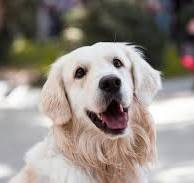

1/1 [==============================] - 1s 1s/step
[[-4.640685   1.8119146]]
1
The image represents a Dog


In [38]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')